In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/word2v-model/word2v_model
/kaggle/input/word2v-model/word2v_model.wv.vectors.npy
/kaggle/input/word2v-model/word2v_model.syn1neg.npy
/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
/kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip
/kaggle/input/load-review/movie_review.h5


In [2]:
df_train = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', sep='\t')
df_test = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip', sep='\t')
add_train = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip', sep='\t')

In [3]:
print(df_train.info())
print(df_train.shape)
print(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
None
(25000, 3)
            id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_

In [4]:
print(df_test.info())
print(df_test.shape)
print(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None
(25000, 2)
             id                                             review
0      12311_10  Naturally in a film who's main themes are of m...
1        8348_2  This movie is a disaster within a disaster fil...
2        5828_4  All in all, this is a movie for kids. We saw i...
3        7186_2  Afraid of the Dark left me with the impression...
4       12128_7  A very accurate depiction of small time mob li...
...         ...                                                ...
24995   2155_10  Sony Pictures Classics, I'm looking at you! So...
24996     59_10  I always felt that Ms. Merkerson had never got...
24997    2531_1  I was so disappointed in this movie. I am very...
24998    7772_8  Fro

In [5]:
print(add_train.info())
print(add_train.shape)
print(add_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None
(25000, 2)
             id                                             review
0      12311_10  Naturally in a film who's main themes are of m...
1        8348_2  This movie is a disaster within a disaster fil...
2        5828_4  All in all, this is a movie for kids. We saw i...
3        7186_2  Afraid of the Dark left me with the impression...
4       12128_7  A very accurate depiction of small time mob li...
...         ...                                                ...
24995   2155_10  Sony Pictures Classics, I'm looking at you! So...
24996     59_10  I always felt that Ms. Merkerson had never got...
24997    2531_1  I was so disappointed in this movie. I am very...
24998    7772_8  Fro

In [6]:
all_train = pd.concat((df_train['review'], add_train['review']), axis=0, ignore_index=True)
print(all_train.isnull().sum())
print(all_train.shape)
print('\n')
print(all_train[49000])
print('\n')
print(all_train[1000])
print('\n')
print(all_train[6679])
print('\n')
print(all_train[18000])

0
(50000,)


At first I thought this film was going to annoy me.It was as though I had seen this movie somewhere before. The disillusioned hero, the father figure and the 9 year old sister who is older and wiser than her years (see Gregory's girl), but then, not 15 minutes in, it became a laugh out loud, comic gem of a movie. Dylan Moran (who I thought was just going to bug me) was excellent. As was Mr Gambon and the mad Scottish hitman. Lena Headey was extremely sexy. For half of the film I was trying to remember where I'd seen her before. The Parole officer. She has the most amazing smile. But clearly the true hero of this film is Mr Caine. This man should do much more comedy. This ranks alongside some of his best comedy roles (Without a Clue, Dirty Rotten Scoundrels). He is a pleasure to watch in all of his scenes but especially the end.<br /><br />No one can quite say f**k the way Michael can. <br /><br />


I watched this movie really late last night and usually if it's late then 

**Pre-process and train a Word2Vec embedding layer**

In [7]:
#cleaning data
from bs4 import BeautifulSoup
import re
def clean_up(review):
    remove_html = BeautifulSoup(review,'html.parser').get_text()
    
    #remove punctuation and numbers
    words_only = re.sub(r'[^A-Za-z\']+',' ',remove_html)
    
    lower_words = words_only.lower()
    
    return lower_words

In [8]:
all_train = all_train.apply(clean_up)

In [9]:
print(all_train[18000])
print('\n')
print(all_train[6679])

this game is one of the best rpg fist it is actually more amusing than any other because of the battle system you harm the enemy depending on how you aim the attack you can transform into dragoon the special attack the magic the script is very good characters are all lovely and you have no long dialogs to support as happened in several games of final fintasy series i got bored of that dialogs about past when you just want to go on with the game's story ambientation is a jewel on this game it combines middle age fantasy with futuristic science fiction it's remarkable that animation effects are just incredible i like them more than other in other modern games we can't remember that legend of the dragoon is years now then map is huge there are all kinds of places an enemies finally music is not the best game muse i have heard but it's perfect for a game like this 


my school's drama club will be putting this show in the spring of and i can only hope we're as good as this i watched this f

In [10]:
from gensim.models import Phrases
sent = [para.split() for para in all_train]
bigram = Phrases(sent)

In [11]:
#testing the bigram - it should be able to detect phrases
print(bigram['the main character is facing a drug addiction'.split()])

['the', 'main_character', 'is', 'facing', 'a', 'drug_addiction']


In [12]:
from gensim.models import Word2Vec
embedding_dim = 256
w2v_model = Word2Vec(sentences=bigram[sent], vector_size=embedding_dim, min_count=1, window=2)

In [13]:
# w2v_model.save('word2v2_model')

In [14]:
print(w2v_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
print(w2v_model.wv.doesnt_match('breakfast cereal dinner lunch'.split()))
print(w2v_model.wv.similarity('woman','man'))
print(w2v_model.wv.most_similar('galaxy'))
print(w2v_model.wv.most_similar('action'))

[('queen', 0.6682846546173096)]
cereal
0.7073809
[('continent', 0.8390602469444275), ('expedition', 0.8092997074127197), ('colony', 0.8020514845848083), ('kingdom', 0.798567533493042), ('monastery', 0.7982974052429199), ('convent', 0.7938479781150818), ('outside_world', 0.7916225790977478), ('wilds', 0.7898500561714172), ('coup', 0.7878689765930176), ('stadium', 0.7830061912536621)]
[('suspense', 0.7386385798454285), ('gore', 0.6534417271614075), ('thrills', 0.6312196850776672), ('horror', 0.6174967885017395), ('adventure', 0.6105847358703613), ('thriller', 0.6082510352134705), ('romance', 0.5973283052444458), ('drama', 0.5910531878471375), ('melodrama', 0.5857731103897095), ('tension', 0.584408164024353)]


In [15]:
# import gensim
# w2v_model = gensim.models.Word2Vec.load('../input/word2v-model/word2v_model')

In [16]:
# print(w2v_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
# print(w2v_model.wv.doesnt_match('breakfast cereal dinner lunch'.split()))
# print(w2v_model.wv.similarity('woman','man'))
# print(w2v_model.wv.most_similar('galaxy'))
# print(w2v_model.wv.most_similar('action'))

In [17]:
len(w2v_model.wv.index_to_key)

140394

In [18]:
w2v_model.wv['lizard']

array([ 1.60716679e-02, -1.61311492e-01,  3.48578836e-03,  1.55944914e-01,
        1.40187681e-01, -7.58040473e-02, -1.76580194e-02, -1.98597424e-02,
        7.16539174e-02,  1.49546146e-01,  9.72417090e-03,  4.29654568e-02,
        8.24288800e-02, -3.00836116e-01,  7.16781169e-02,  1.81177422e-01,
       -2.94052511e-02, -2.98384614e-02,  2.31509991e-02,  2.27758139e-01,
        1.09600998e-01, -2.51148880e-01,  1.14730731e-01, -3.74617904e-01,
       -2.47870535e-01,  1.32403970e-01,  8.76872838e-02,  9.10345539e-02,
        4.39616777e-02, -2.20892832e-01,  2.08099097e-01,  2.24325567e-01,
       -2.77108133e-01, -6.50374368e-02,  6.22756667e-02,  1.63865864e-01,
        1.99526623e-02, -1.96890309e-01,  7.47306794e-02,  1.65076647e-02,
       -2.44840994e-01,  2.14752778e-01, -2.83933729e-02, -9.48312059e-02,
        3.50616932e-01, -4.37551849e-02, -7.10574631e-03,  6.91300556e-02,
        2.28597552e-01,  2.51163933e-02, -2.16359854e-01, -3.43660600e-02,
       -1.20741092e-01,  

**Tokenization of training set, train test split, building embedding matrix**

In [19]:
df_train

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


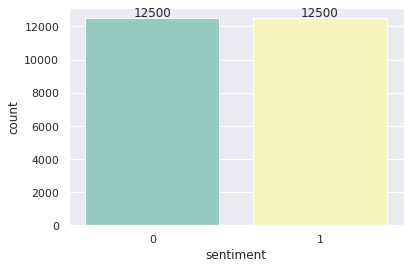

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='sentiment', data=df_train, palette='Set3')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height +100,
           df_train['sentiment'].value_counts()[i], ha='center')
    i += 1

The provided training data is a perfect balance between positive and negative reviews.

In [21]:
#clean up training set
df_train['review'] = df_train['review'].apply(clean_up)

In [22]:
y = df_train['sentiment'].values
x = df_train['review'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
from tensorflow.keras.layers import Input, Dense, GlobalMaxPool1D, Embedding, LSTM
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
seq_train = tokenizer.texts_to_sequences(x_train)
seq_val = tokenizer.texts_to_sequences(x_val)

2021-10-10 01:31:38.052062: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [25]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 78612 unique tokens


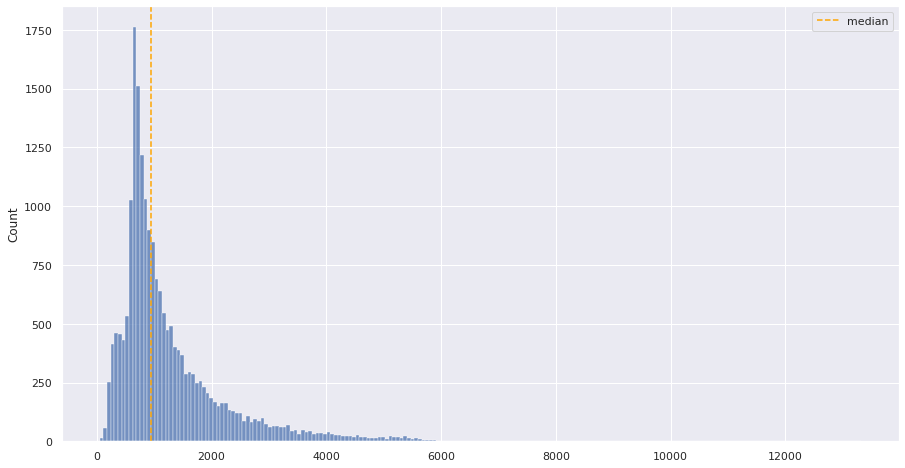

In [26]:
import statistics
words_per_review = [len(x) for x in x_train]
plt.figure(figsize=(15,8))
ax = sns.histplot(words_per_review)
ax.axvline(x=statistics.median(words_per_review), linestyle='--', c='orange', label='median')
_ = ax.legend()

In [27]:
maxlen = 4000
reviewbelow = len([x for x in words_per_review if x<maxlen])
tot_reviews = len(x_train)
reviewbelow / tot_reviews

0.9726

In [28]:
seq_train = pad_sequences(seq_train, maxlen=maxlen)
seq_val = pad_sequences(seq_val, maxlen=maxlen)

In [29]:
len(seq_train[0])

4000

In [30]:
len(seq_val[0])

4000

In [31]:
list(word2idx.items())[:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('in', 7),
 ('it', 8),
 ('i', 9),
 ('this', 10)]

In [32]:
w2v_model.wv['backdrop']

array([ 6.95874169e-02, -3.99966717e-01, -7.41640776e-02, -8.92141312e-02,
       -1.52890593e-01, -1.47041246e-01, -6.62899539e-02,  7.46047854e-01,
        1.34651503e-02,  4.45556849e-01,  2.38423869e-01, -2.81497121e-01,
        3.61437611e-02, -3.54052186e-01, -2.56736517e-01,  1.34201586e-01,
        6.77741289e-01,  6.02054179e-01, -1.49796069e-01,  2.01431215e-01,
       -2.82123238e-01, -2.68831223e-01,  4.66687709e-01, -2.98723336e-02,
        9.34008658e-02, -4.79113162e-01, -3.84582281e-01,  1.34632900e-01,
        4.14539836e-02,  1.84160113e-01, -4.79270816e-01,  3.04728568e-01,
        5.23987487e-02,  2.21891209e-01,  4.13956374e-01, -4.50324193e-02,
        2.14913830e-01, -1.58784851e-01,  1.98956192e-01, -5.82966395e-02,
        6.09019846e-02,  7.32147872e-01,  2.38165408e-01,  1.03323065e-01,
       -5.45974337e-02, -3.66169155e-01,  1.93485379e-01,  3.45147312e-01,
        2.19625890e-01,  2.81795323e-01,  3.62907499e-01, -2.14093029e-01,
       -7.66219348e-02,  

In [33]:
embedding_dim = 256 #to match the embedding dim used to train w2v model
hits = 0
misses = 0

#prepare embedding matrix
embedding_matrix = np.zeros((V+1, embedding_dim))
for word, i in word2idx.items():
    try:
        embedding_vector = w2v_model.wv[word]
        #Words not found in w2v model will be all-zeros.
        #This includes the representation of OOV and padding
        embedding_matrix[i] = embedding_vector
        hits += 1
    except:
        misses += 1
    
print('Converted %d words (%d misses)' % (hits, misses))
    

Converted 78194 words (418 misses)


In [34]:
embedding_dim

256

**Load the trained Word2Vec embedding matrix into an Embedding layer for Keras**

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    V+1, 
    embedding_dim,
    trainable=False,
    input_length = maxlen,
    weights = [embedding_matrix],
)

In [36]:
#setting callbacks/regularization
from tensorflow.keras import callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.0000001,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delta = 0.0000001,                                
    cooldown = 0,                               
    verbose = 1
) 

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

M = 128
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=M, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics='accuracy')

2021-10-10 01:31:51.023656: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-10 01:31:51.027112: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-10 01:31:51.064444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-10 01:31:51.065080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-10 01:31:51.065145: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-10 01:31:51.090438: I tensorflow/stream_executor/platform/def

In [38]:
r = model.fit(seq_train, y_train, epochs=20, validation_data=(seq_val, y_val),callbacks=[early_stop, plateau])

2021-10-10 01:31:53.841753: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-10 01:31:53.851679: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000129999 Hz


Epoch 1/20


2021-10-10 01:31:55.054416: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-10 01:31:55.831178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-10 01:31:55.953684: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


625/625 [==============================] - 146s 222ms/step - loss: 0.4964 - accuracy: 0.7382 - val_loss: 0.2947 - val_accuracy: 0.8708
Epoch 2/20
625/625 [==============================] - 138s 221ms/step - loss: 0.2766 - accuracy: 0.8873 - val_loss: 0.2871 - val_accuracy: 0.8756
Epoch 3/20
625/625 [==============================] - 138s 221ms/step - loss: 0.2323 - accuracy: 0.9075 - val_loss: 0.2489 - val_accuracy: 0.8960
Epoch 4/20
625/625 [==============================] - 138s 221ms/step - loss: 0.1948 - accuracy: 0.9248 - val_loss: 0.2472 - val_accuracy: 0.8978
Epoch 5/20
625/625 [==============================] - 138s 221ms/step - loss: 0.1667 - accuracy: 0.9405 - val_loss: 0.2966 - val_accuracy: 0.8778
Epoch 6/20
625/625 [==============================] - 139s 222ms/step - loss: 0.1436 - accuracy: 0.9470 - val_loss: 0.2651 - val_accuracy: 0.8952

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/20
625/625 [==============================] -

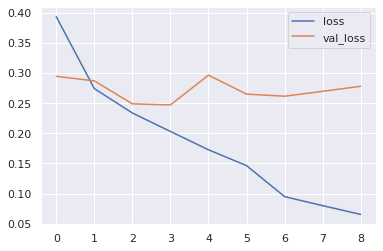

In [39]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
_ = plt.legend()

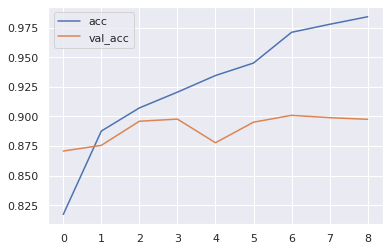

In [40]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
_=plt.legend()

In [41]:
# model.save('movie_review.h5')
# model = tf.keras.models.load_model('../input/load-review/movie_review.h5')
# model.summary()

In [42]:
df_test['review'] = df_test['review'].apply(clean_up)
x_pred = df_test['review'].values
seq_xpred = tokenizer.texts_to_sequences(x_pred)
pad_xpred = pad_sequences(seq_xpred, maxlen=maxlen)

In [51]:
y_pred = model.predict(pad_xpred)

In [53]:
y_pred = np.round(y_pred)

In [142]:
i = np.random.choice(range(len(y_pred)))
print('%s vs [%s]' %(y_pred[i],x_pred[i]))

[1.] vs [for those of you who've wondered what an art house monster movie might be like wonder no more the daimajin trilogy circa was just such a series more period samurai epics than anything else these three movies just also happen to feature one of the most literally monstrous deux et machinas ever there's not a single facet of these gems that is unpolished from the scenario s to the performances to the filmmaker's craftsmanship even the special effects are handled with well above average skill and are integrated in most instances almost seamlessly into the movie s if you're a gojira fan or a fan of samurai movies or one of us who just likes a good movie regardless of genre i highly recommend the daimajin trilogy ]


In [140]:
i = np.random.choice(range(len(y_pred)))
print('%s vs [%s]' %(y_pred[i],x_pred[i]))

[0.] vs [nothing to watch here it's all been done and better before who cares about this woman deficient in every way as a mother as a wife and as a friend in one instant when she could have taken the high road she jumped into re addiction with both feet and held her breath for no better a reason than me too if she wasn't the pretty and young person she portrays on screen but looked more like the real human wreckage that is represented by our family members neighbors and friends who really suffer from additions we'd change channels in a nanosecond this movie starts out at the bottom and goes downhill nothing redeeming no lessons taught nothing uplifting in any way none of the main characters even evoke sympathy let alone empathy well maybe the snake i would have had more fun if i'd shut a door on my hand who needs drivel like this ]


In [171]:
# Copy pasted IMDB reviews with ratings to check 
d = {1:'''I don't know that I've ever seen a movie more oppressively depressing and embarrassingly overwrought than "Detachment". And I've seen myself a few of 'em.

A stunning collection of acclaimed acting talent including Adrien Brody, Marcia Gay Harden, James Caan, Blythe Danner and William Peterson are uniformly wasted in this miserable mess. And that's damn hard to accomplish. It's as if the whole lot of 'em were somehow convinced to participate by Director Tony Kaye with a patronizing pitch along the lines of, "Hey. Let's all make an overly dramatic statement movie that sledgehammers the audience repeatedly over the skull about how the American public education system is egregiously failing our kids. And then, for good measure, we'll toss in some shots at the rotten state of Long Term Elderly Care Facilities while we're at it. Come on. It'll be awesome."

The resultant refuse is about as "detached" from "awesome" as one can possibly conjure.

There is certainly a high-caliber film to be made that draws desperately needed attention to the authentic and alarming issues raised in "Detachment". And despite apparent earnest efforts, this dispiriting debacle leaves us still wanting.'''}

pred = np.array(pd.Series(data=d).apply(clean_up))
seq_pred = tokenizer.texts_to_sequences(pred)
pad_xpred = pad_sequences(seq_pred, maxlen=maxlen)
model.predict(pad_xpred)

array([[0.01249813]], dtype=float32)

In [64]:
sample = pd.read_csv('../input/word2vec-nlp-tutorial/sampleSubmission.csv')
sample

,id,sentiment
0,12311_10,0
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,0
...,...,...
24995,2155_10,0
24996,59_10,0
24997,2531_1,0
24998,7772_8,0


In [146]:
submission = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip', sep='\t')
submission

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...
...,...,...
24995,2155_10,"Sony Pictures Classics, I'm looking at you! So..."
24996,59_10,I always felt that Ms. Merkerson had never got...
24997,2531_1,I was so disappointed in this movie. I am very...
24998,7772_8,"From the opening sequence, filled with black a..."


In [148]:
def submit(y_pred):
    submission['sentiment'] = y_pred
    submission.to_csv('submission.csv', index=False, columns=['id','sentiment'])

submit(y_pred)